In [133]:
import tellurium as te
import matplotlib.pyplot as plt

%matplotlib inline  

# Defining a model in Antimony and simulating it using roadrunner

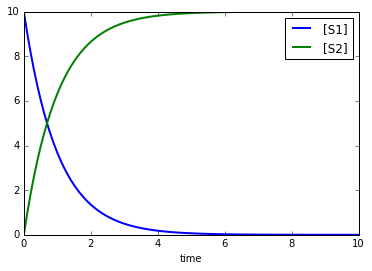

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [135]:
antimony_model = """
S1 -> S2; k1*S1;

# Initialize values
S1 = 10; 
S2 = 0;

# parameters
k1 = 1;
"""

# create a roadrunner instance using the model defined above
rr = te.loada(antimony_model)

# Carry out a time course simulation results returned in array result.
# Arguments are: time start, time end, number of points
result = rr.simulate (0, 10, 100)

# Plot the results
rr.plot (result)

### a model structure can be generated automatically

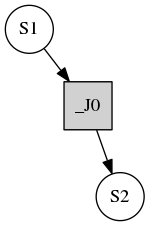

In [122]:
rr.draw()

### lets look at the SBML 

In [123]:
print rr.getSBML()

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.8.0 with libSBML version 5.13.0. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model id="__main" name="__main">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="S1" compartment="default_compartment" initialConcentration="10" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="S2" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
    </listOfSpecies>
    <listOfParameters>
      <parameter id="k1" value="1" constant="true"/>
    </listOfParameters>
    <listOfReactions>
      <reaction id="_J0" reversible="true" fast="false">
        <listOfReactants>
          <speciesReference species="S1

# a second simulation takes the end values of the last as initial values

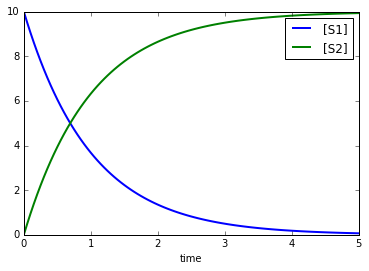

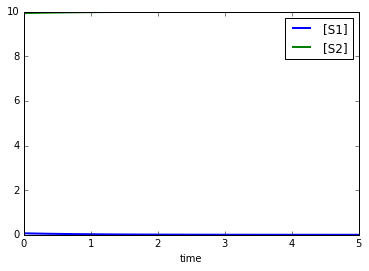

In [59]:
rr = te.loada(antimony_model)

# simulate the model 2 times for 5 seconds each
for k in range(2):
    result = rr.simulate(0, 5, 100) #, reset=True)
    rr.plot(result)

# simple parameter scan

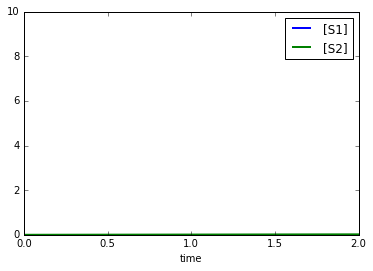

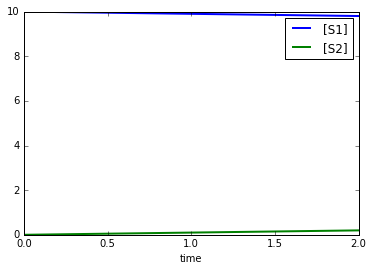

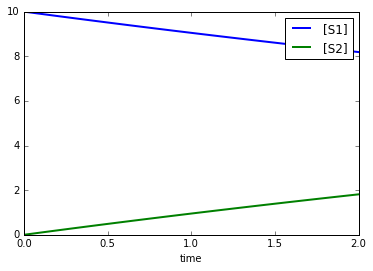

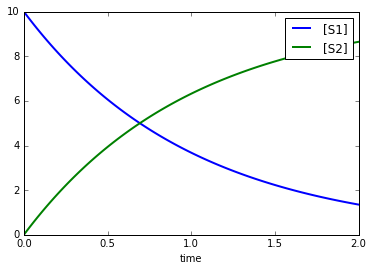

In [58]:
k1_values = [0.001, 0.01, 0.1, 1]

# simulate the model for all different k1 values and plot the result
for k1 in k1_values:
    rr.k1 = k1
    result = rr.simulate(0, 2, 100, reset=True)
    rr.plot(result)

# models can be loaded directly from SBML 

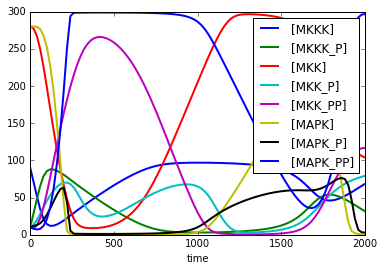

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [108]:
rr = te.loadSBMLModel("http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000010")
result = rr.simulate(0, 2000, 100)
rr.plot(result)

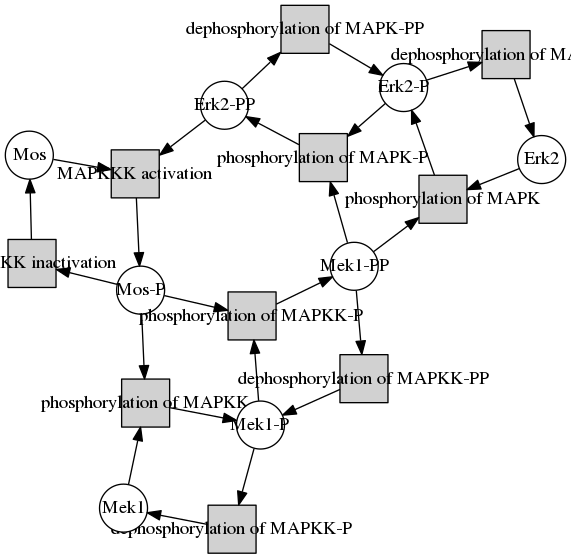

In [104]:
# how does the model structure look like?
rr.draw()

# choose between deterministic (ODE) and stochastic solvers

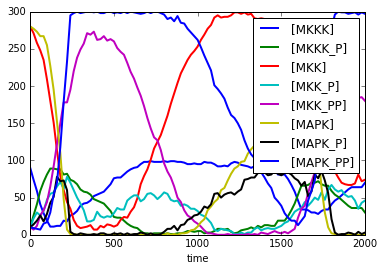

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [117]:
rr.setIntegrator('gillespie')
result = rr.simulate(0, 2000, 100, reset=True)
rr.plot(result)

In [115]:
# some useful methods
rr.getFullStoichiometryMatrix()
rr.getConservationMatrix()
rr.getFullEigenValues()

array([-0.23738780+0.j        , -0.10464804+0.j        ,
       -0.00334736+0.j        , -0.00106603+0.00027316j,
       -0.00106603-0.00027316j,  0.00000000+0.j        ,
        0.00000000+0.j        ,  0.00000000+0.j        ])